In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

In [29]:
adata = ad.read_h5ad('adata_C_FINAL.h5ad')
cell_type_colors = {
    'Dendritic Cell': '#DD933C',
    'Macrophage': '#78CBC9',
    'Epithelium': '#CC9BBD',
    'B Cell': '#BAB733',
    'VIM+ COLIV+ Stroma': '#EB008B',
    'Endothelium': '#AA4456',
    'CD8 T Cell': '#B90700',
    'Tumor': '#144577'
}

sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cellType")

100%|██████████| 1000/1000 [00:32<00:00, 30.44/s]


/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/mnt/scratch1/miniconda3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_utils.py:555: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


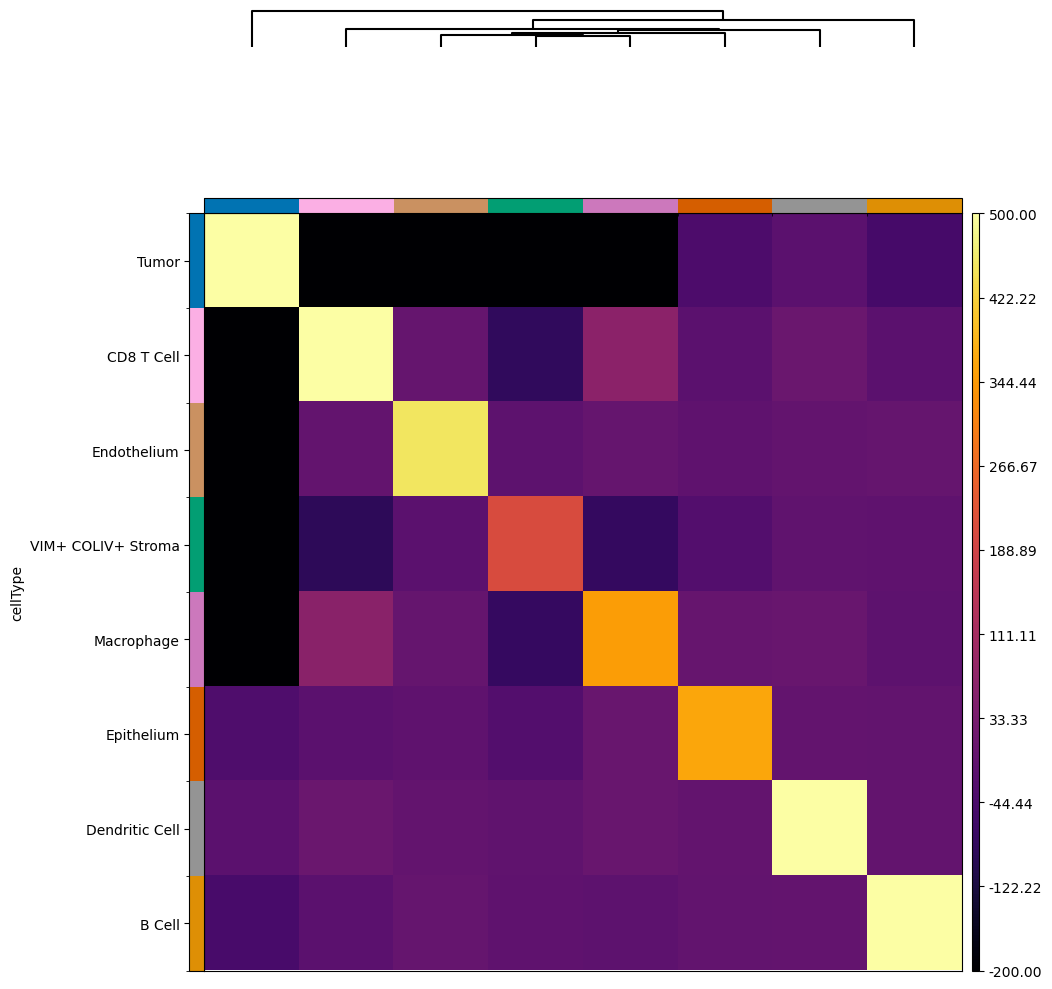

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sq.pl.nhood_enrichment(adata, cluster_key="cellType", cmap='inferno', ax=ax, title='', 
                       vmax=500, vmin=-200, method='ward', mode='zscore')
plt.tight_layout()
fig.savefig('EnrichmentMatrix.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [20]:
adata = ad.read_h5ad('adata_C_FINAL.h5ad')
cell_type_colors = {
    'Dendritic Cell': '#DD933C',
    'Macrophage': '#78CBC9',
    'Epithelium': '#CC9BBD',
    'B Cell': '#BAB733',
    'VIM+ COLIV+ Stroma': '#EB008B',
    'Endothelium': '#AA4456',
    'CD8 T Cell': '#B90700',
    'Tumor': '#144577'
}

# Apply the color mapping to the AnnData object
adata.uns['cellType_colors'] = [cell_type_colors[ct] for ct in adata.obs['cellType'].cat.categories]
sq.gr.spatial_neighbors(adata)
sq.gr.interaction_matrix(adata, cluster_key="cellType")

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/mnt/scratch1/miniconda3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_utils.py:555: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


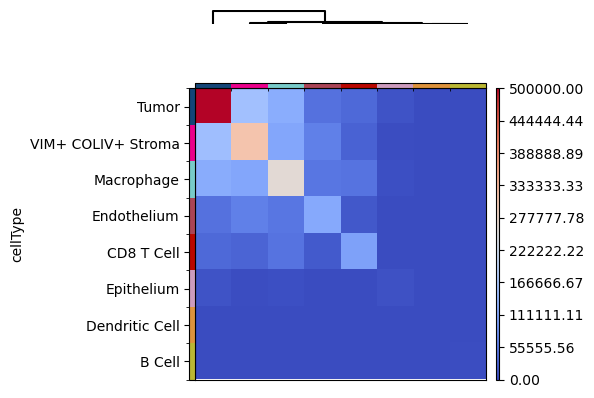

In [27]:
fig, ax = plt.subplots()
sq.pl.interaction_matrix(adata, cluster_key="cellType", cmap='coolwarm', ax=ax, title='', 
                         method='ward', vmax=500000)
# fig.savefig('InteractionMatrix.pdf', format='pdf', bbox_inches='tight')
plt.show()